In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('../data/Lena.png', 0).astype(np.float32) / 255

In [3]:
fft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
fft_shift = np.fft.fftshift(fft, axes=[0, 1])

In [12]:
sz = 25
mask = np.zeros(fft_shift.shape, np.uint8)
mask[mask.shape[0]//2-sz:mask.shape[0]//2+sz,
     mask.shape[1]//2-sz:mask.shape[1]//2+sz, :] = 1
fft_shift *= mask

In [13]:
fft = np.fft.ifftshift(fft_shift, axes=[0, 1])

In [14]:
filtered = cv2.idft(fft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

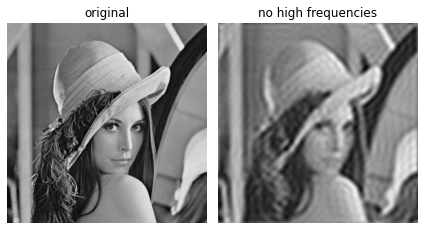

In [15]:
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.title('no high frequencies')
plt.imshow(filtered, cmap='gray')
plt.tight_layout()
plt.show()